# Dataset Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

sns.set_style("dark")  
custom_palette = sns.color_palette("Reds", 7)[::-1]
sns.set_palette(custom_palette)

In [805]:
df = pd.read_csv("wines.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [807]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [808]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [809]:
for i in df.columns:
    print(f"Values of Colum -> {df[i].value_counts()}")

Values of Colum -> Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64
Values of Colum -> Malic_Acid
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: count, Length: 133, dtype: int64
Values of Colum -> Ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: count, Length: 79, dtype: int64
Values of Colum -> Ash_Alcanity
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: count, Length: 63, dtype: int64
Values of Colum -> Magnesium
88     13
86     11
98      9
101     9
96      8
102     7
94      6
85      6
112     6
97      5
92      5
80      5
103     5
89      5
90      4
108     4
107     4
106     4
87      3
120     3
95      3
78      3
111     3
84      3
118

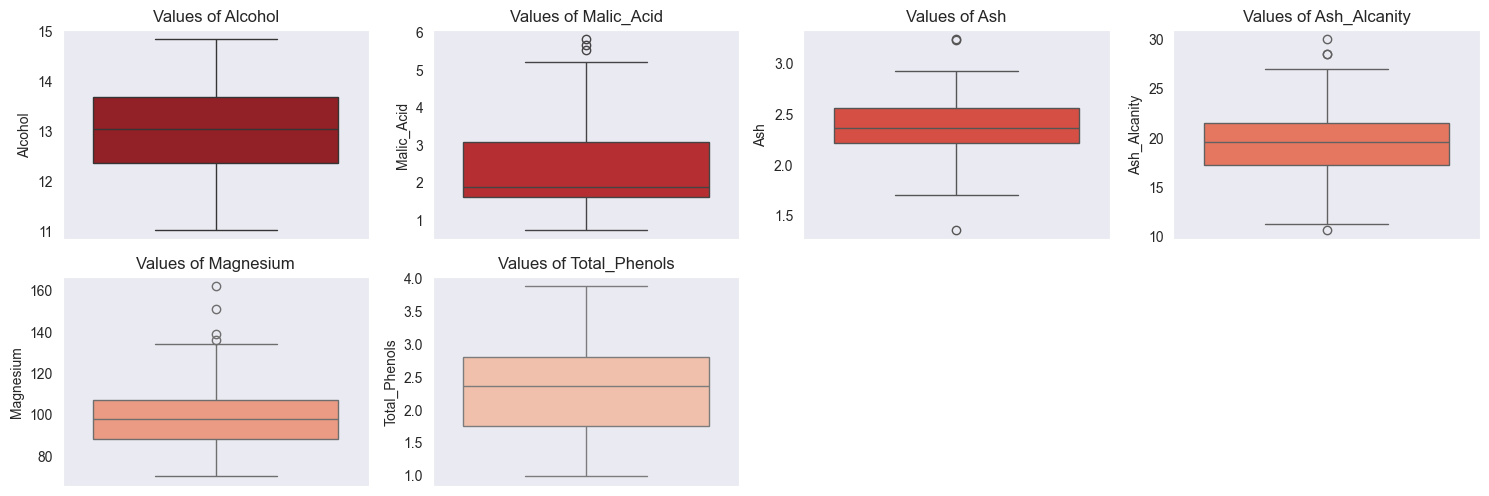

In [810]:
outliers = df.select_dtypes(include="number").columns
outliers1 = outliers[:6]

fig, ax = plt.subplots(4,4, figsize=(15,10))
ax = ax.flatten()

for i, col in enumerate(outliers1):
    color = custom_palette[i % len(custom_palette)]
    sns.boxplot(df, y=col, ax=ax[i], color=color)
    ax[i].set_title(f"Values of {col}")
    
for i in range(len(outliers1), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

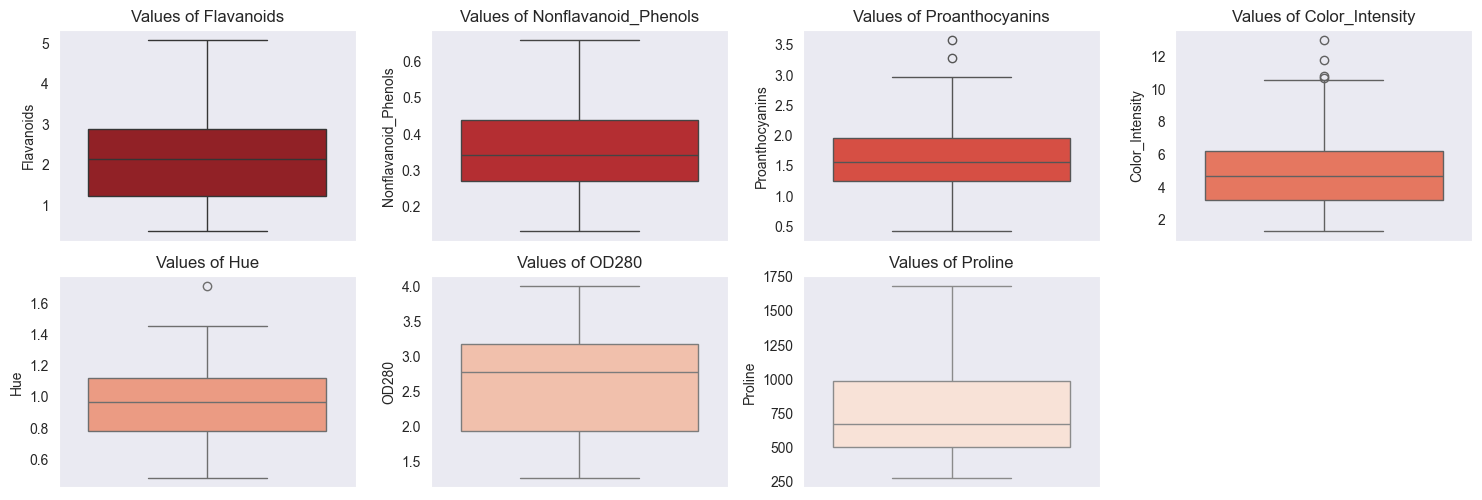

In [811]:
outliers2 = outliers[6:]

fig, ax = plt.subplots(4,4, figsize=(15,10))
ax = ax.flatten()

for i, col in enumerate(outliers2):
    color = custom_palette[i % len(custom_palette)]
    sns.boxplot(df, y=col, ax=ax[i], color=color)
    ax[i].set_title(f"Values of {col}")
    
for i in range(len(outliers2), len(ax)):
    fig.delaxes(ax[i])
    
plt.tight_layout()
plt.show()

# Feature Enginer

## Transform Categorical Variables into Numeric Ones

In [812]:
from sklearn.preprocessing import StandardScaler

In [813]:
scaler = StandardScaler()
df_esc = scaler.fit_transform(df)

# Clustering Algorithms

## KMeans

In [814]:
from sklearn.cluster import KMeans

In [815]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=5, max_iter=300).fit(df_esc)
    wcss.append(kmeans.inertia_)

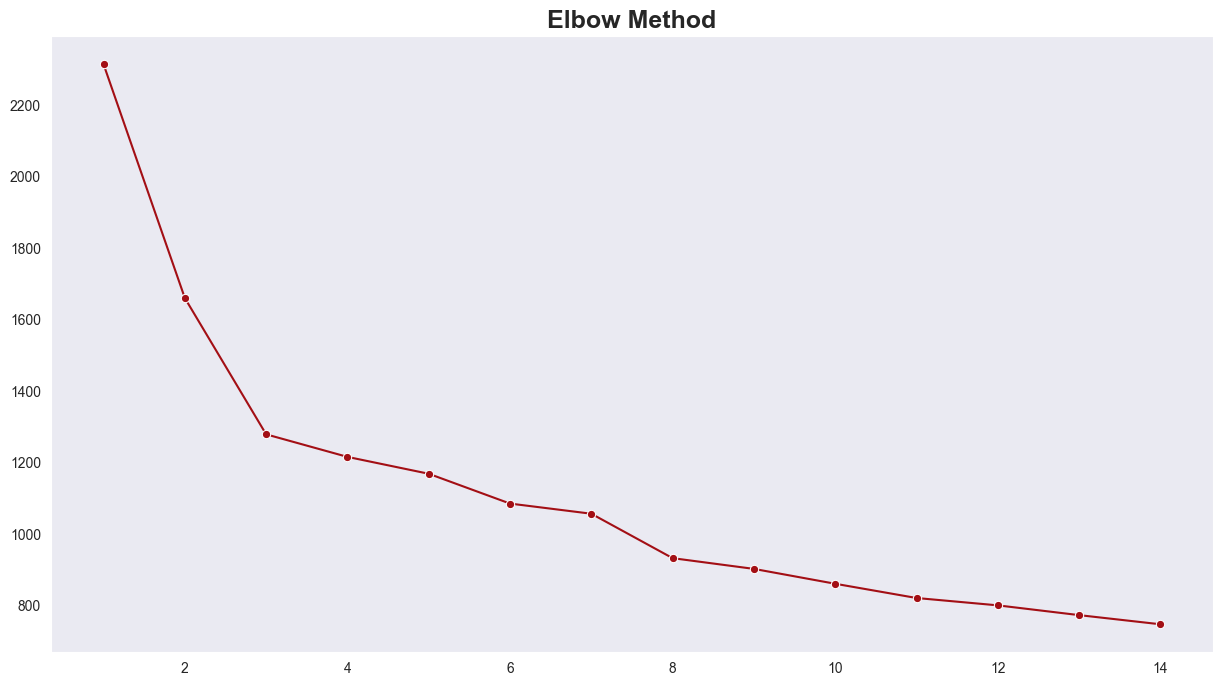

In [816]:
plt.figure(figsize=(15,8))
sns.lineplot(x=range(1,15), y=wcss, marker="o")
plt.title("Elbow Method", fontsize=18, fontweight="bold")
plt.show()

In [817]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=5, max_iter=300).fit(df_esc)

In [818]:
silhouette_score(df_esc, kmeans.labels_)

0.28594199657074876

### KMeans with PCA

In [819]:
from sklearn.decomposition import PCA

In [820]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_esc)

In [821]:
wcss_pca = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=5, max_iter=300).fit(df_pca)
    wcss_pca.append(kmeans.inertia_)

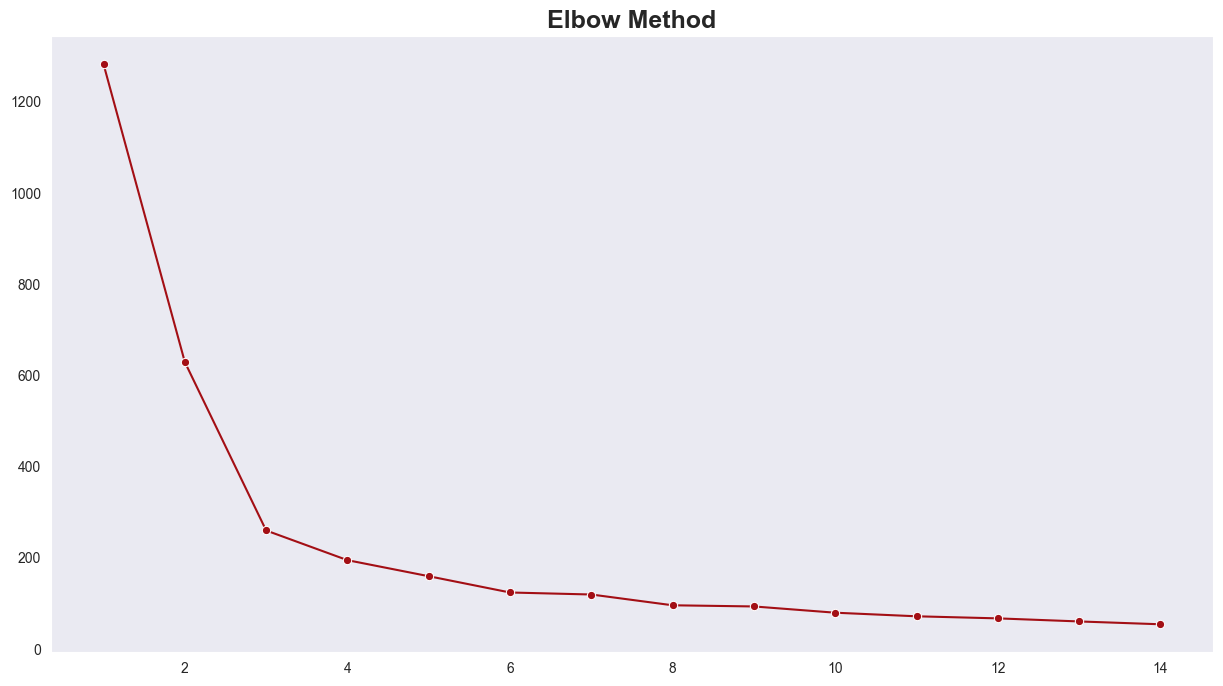

In [822]:
plt.figure(figsize=(15,8))

sns.lineplot(y=wcss_pca, x=range(1,15), marker="o")
plt.title("Elbow Method", fontsize=18, fontweight="bold")
plt.show()

In [823]:
kmeans_pca = KMeans(n_clusters=3, init="k-means++", random_state=42, max_iter=300).fit(df_pca)

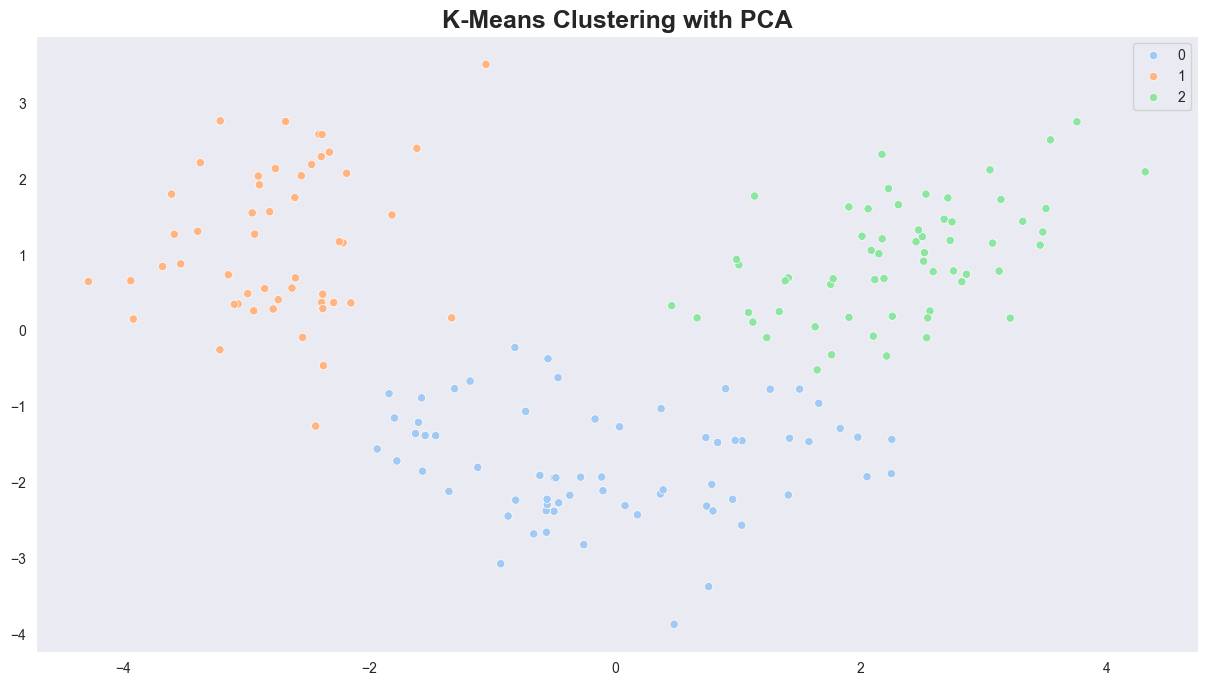

In [824]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=kmeans_pca.labels_, palette="pastel")
plt.title("K-Means Clustering with PCA" , fontsize=18, fontweight="bold")
plt.legend()
plt.show()

In [825]:
silhouette_score(df_pca, kmeans_pca.labels_)

0.5601697480957203

## Hierarchical Grouping

In [826]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

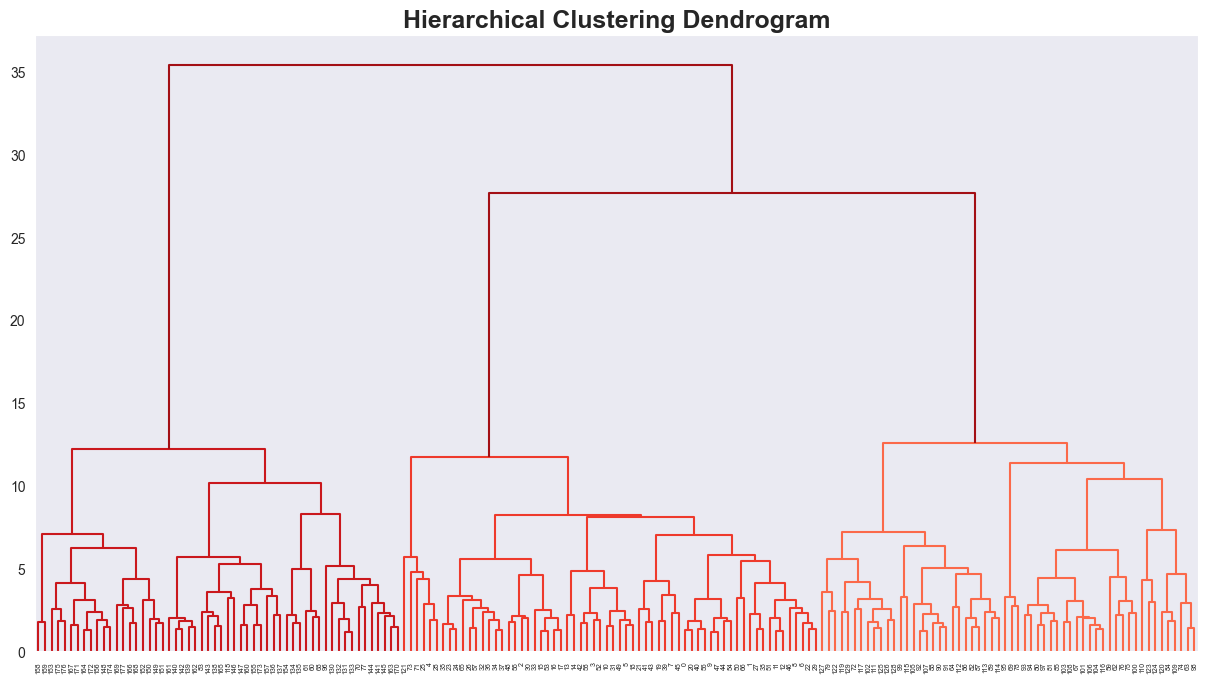

In [827]:
plt.figure(figsize=(15,8))

Z= linkage(df_esc, method="ward")
plt.title("Hierarchical Clustering Dendrogram", fontsize=18, fontweight="bold")

dendro = dendrogram(Z)

In [828]:
hier = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
df_hier = hier.fit_predict(df_esc)

In [829]:
silhouette_score(df_esc, df_hier, metric="euclidean")

0.2774439826952265

### Hierarchical Clustering with PCA

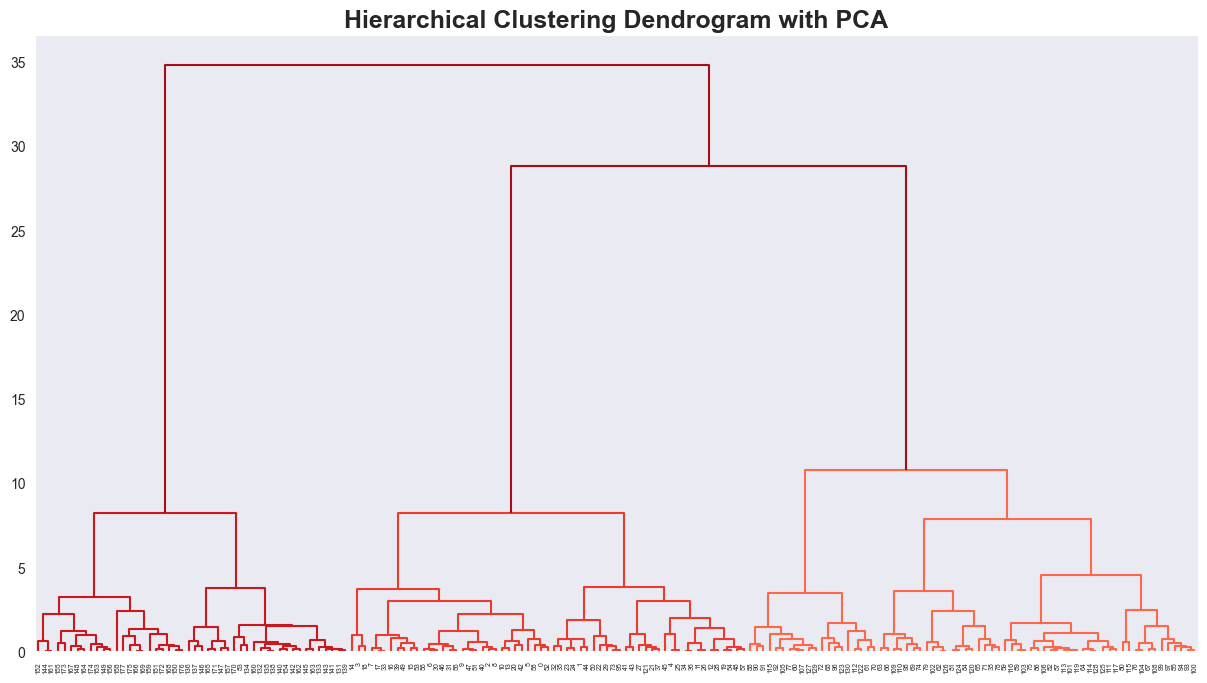

In [830]:
plt.figure(figsize=(15,8))

Z= linkage(df_pca, method="ward")
plt.title("Hierarchical Clustering Dendrogram with PCA", fontsize=18, fontweight="bold")
dendro = dendrogram(Z)

In [831]:
silhouette_score(df_esc, kmeans.labels_)

0.03362632122601249

In [832]:
hier_pca = AgglomerativeClustering(n_clusters=3, linkage="complete", metric="euclidean")
df_hier_pca = hier_pca.fit_predict(df_pca)

In [833]:
silhouette_score(df_pca, df_hier_pca, metric="euclidean")

0.5135476900345354

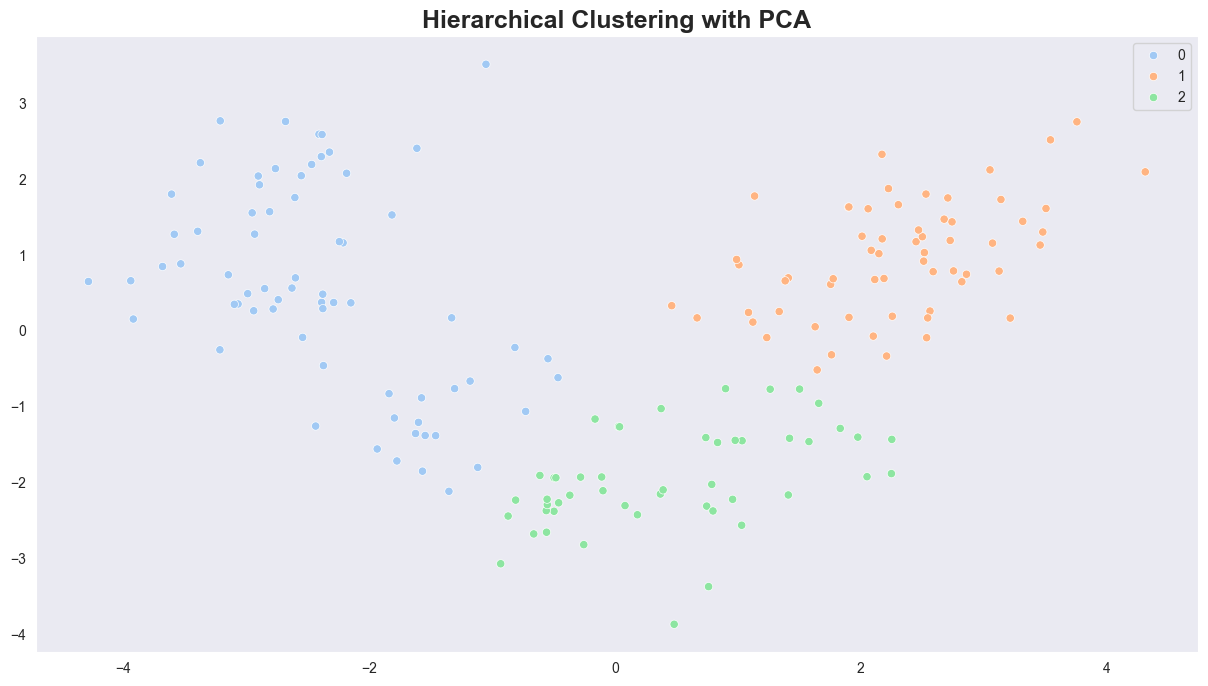

In [834]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_pca_hier[:,0], y=df_pca_hier[:,1], hue=df_hier_pca, palette="pastel")
plt.title("Hierarchical Clustering with PCA", fontsize=18, fontweight="bold")
plt.legend()
plt.show()

## Mean Shift

In [835]:
from sklearn.cluster import MeanShift

In [836]:
mean = MeanShift(bandwidth=1.5, cluster_all=True).fit(df_esc)

In [837]:
silhouette_score(df_esc, mean.labels_)

0.05364214848709465

### Mean Shift with PCA

In [838]:
mean = MeanShift(bandwidth=1, cluster_all=True).fit(df_pca)

In [839]:
silhouette_score(df_pca, mean.labels_)

0.455193000591445

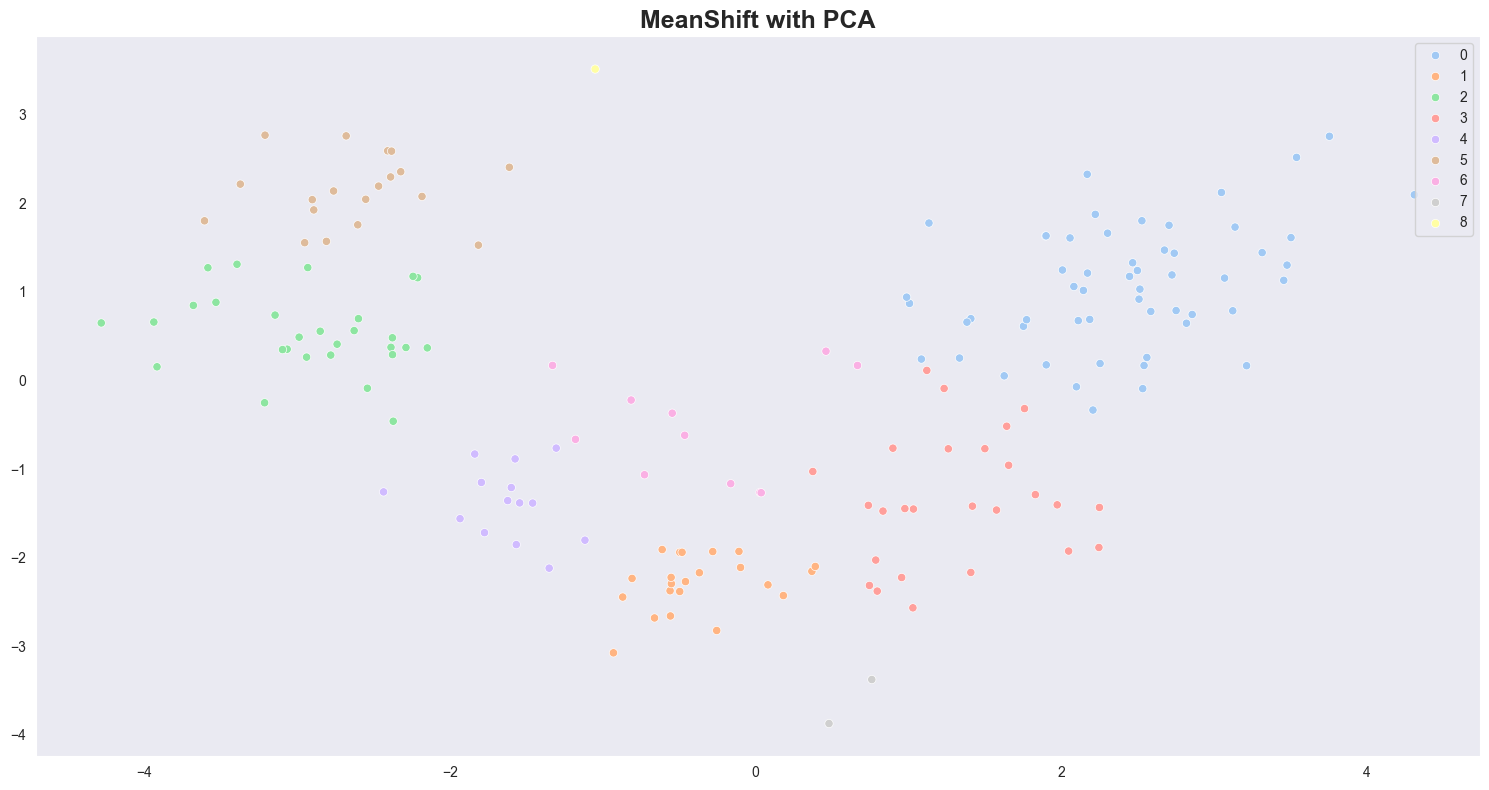

In [840]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=mean.labels_, palette="pastel")
plt.title("MeanShift with PCA", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

# Conclusion

> Among the clustering models tested, K-Means with PCA showed the best performance based on the silhouette coefficient (silhouette_score). This metric evaluates how well each point is inserted into its cluster, comparing the internal cohesion (average distance between points in the same group) with the separation in relation to the other clusters.

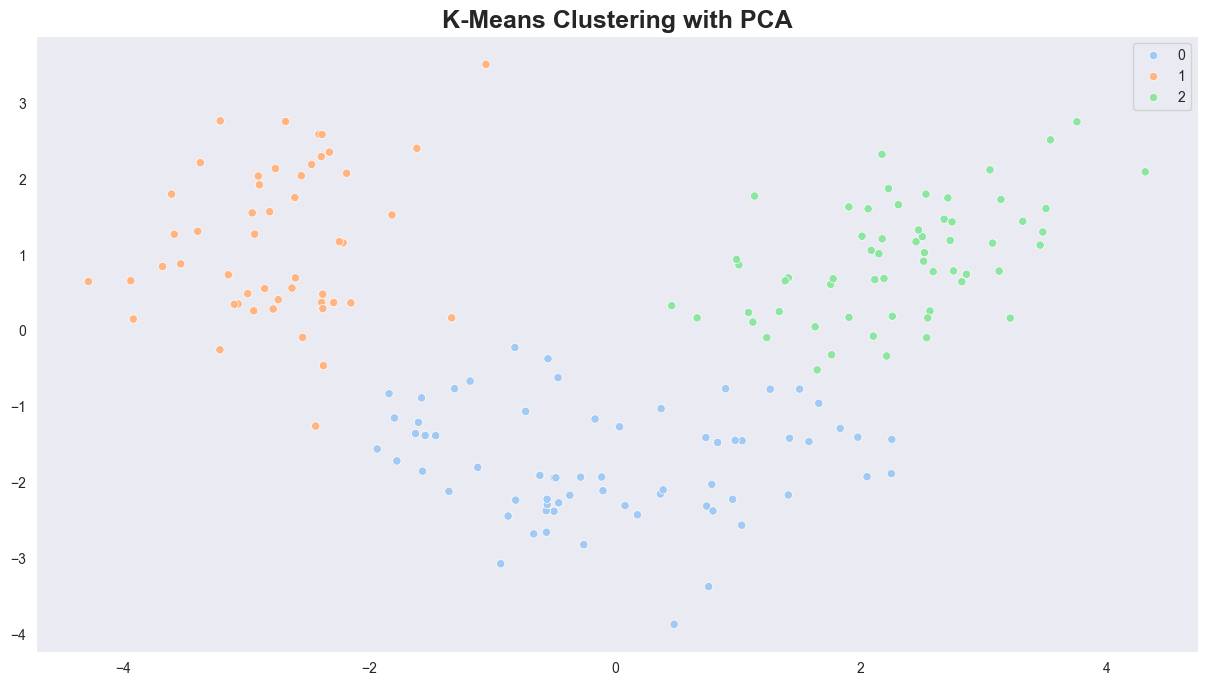

In [841]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=kmeans_pca.labels_, palette="pastel")
plt.title("K-Means Clustering with PCA", fontsize=18, fontweight="bold")
plt.legend()
plt.show()

In [842]:
labels = kmeans_pca.labels_
df["Cluster"] = labels

In [843]:
df["Cluster"].value_counts()

Cluster
0    67
2    61
1    50
Name: count, dtype: int64

In [844]:
df.loc[df.Cluster == 0]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,0
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,0
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,0
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,0
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,0
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,0
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,0
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,0


In [845]:
cluster_medio = df.groupby("Cluster").mean()
cluster_medio.T

Cluster,0,1,2
Alcohol,12.268955,13.1440,13.686721
Malic_Acid,1.883433,3.3462,2.006066
Ash,2.226119,2.4256,2.472295
Ash_Alcanity,19.946269,21.3300,17.495082
Magnesium,92.925373,98.6400,108.131148
Total_Phenols,2.246567,1.6772,2.854918
Flavanoids,2.049254,0.8070,3.009180
Nonflavanoid_Phenols,0.359104,0.4504,0.292295
Proanthocyanins,1.605373,1.1564,1.931148
Color_Intensity,3.025373,7.2644,5.482295


## Cluster Analysis

### **Cluster 0: Light and Moderate Wine**
- **Alcohol Content**: 12.27 (Moderate)
- **Malic Acid**: 1.88 (Low) – Smoother profile.
- **Total Phenols**: 2.25 (Moderate) – Intermediate level of antioxidant compounds.
- **Flavonoids**: 2.05 (Moderate) – Medium color and structure.
- **Color Intensity**: 3.03 (Low) – Lighter, more delicate wine.
- **Proline**: 516.88 (Medium) – Balanced amino acid content typical of lighter wines.
  
**Summary**: Cluster 0 represents wines with moderate alcohol content, low malic acid, and lighter color intensity, indicating a more balanced and delicate profile.

---

### **Cluster 1: Fresh and Acidic Wine**
- **Alcohol Content**: 13.14 (Moderate)
- **Malic Acid**: 3.35 (High) – More acidic and fresh profile.
- **Total Phenols**: 1.68 (Low) – Lower concentration of antioxidant compounds.
- **Flavonoids**: 0.81 (Low) – Lighter color and structure.
- **Color Intensity**: 7.26 (High) – Richer, more intense color.
- **Proline**: 622.44 (Medium) – Similar balance as Cluster 0.

**Summary**: Cluster 1 characterizes wines with higher acidity, greater color intensity, fresher taste, but lower phenols and flavonoids, suggesting a lighter, more acidic profile.

---

### **Cluster 2: Full-bodied and Complex Wine**
- **Alcohol Content**: 13.69 (High) – Stronger alcoholic profile.
- **Malic Acid**: 2.01 (Low) – Smoother, less acidic profile.
- **Total Phenols**: 2.85 (High) – Higher concentration of antioxidant compounds.
- **Flavonoids**: 3.01 (High) – High concentration, indicating intense color and structure.
- **Color Intensity**: 5.48 (High) – Deep and rich color.
- **Proline**: 1101.54 (High) – Higher amino acid content, typical of full-bodied wines.

**Summary**: Cluster 2 represents wines with higher alcohol content, higher levels of phenols and flavonoids, and greater color intensity, suggesting full-bodied and complex wines.
